In [33]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(results))
len(june_temps)

1700

In [14]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['June Temperature'])
june_df

,June Temperature
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [15]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [11]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(results))
len(dec_temps)

1517

In [16]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(dec_temps, columns=['December Temperature'])
december_df


,December Temperature
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [17]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [20]:
results =session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

In [21]:
june_precipitation = list(np.ravel(results))
len(june_precipitation)

1700

In [25]:
june_precipitation_df = pd.DataFrame(june_precipitation, columns=['June rainfall'])
june_precipitation_df
june_precipitation_df.describe()

,June rainfall
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


Text(0.5, 1.0, 'June Precipitation')

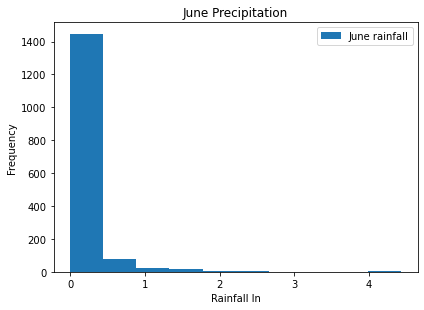

In [37]:
june_precipitation_df.plot.hist(bins=10)
plt.tight_layout()  #compress the x-axis labels
plt.xlabel('Rainfall In')
plt.title('June Precipitation')

In [23]:
results =session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

In [24]:
December_precipitation = list(np.ravel(results))
len(December_precipitation)

1517

In [32]:
December_precipitation_df = pd.DataFrame(December_precipitation, columns=['December Precipitation'])
December_precipitation_df
December_precipitation_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


Text(0.5, 1.0, 'December Precipitation')

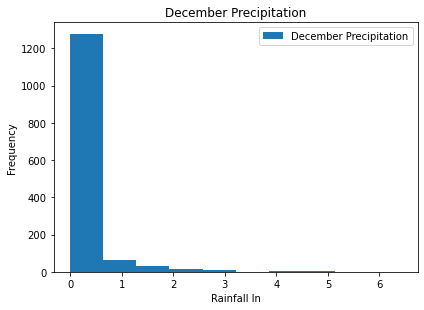

In [35]:
December_precipitation_df.plot.hist(bins=10)
plt.tight_layout()  #compress the x-axis labels
plt.xlabel('Rainfall In')
plt.title('December Precipitation')